# W11-H22

### 1. Using the imported libraries, plot the distribution of three variables of choice for the breast cancer dataset. Discuss the normality of the distribution and explain if the data needs any transformation.

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [40]:
from sklearn import datasets

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(datasets.load_breast_cancer())
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [41]:
df.columns.values

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'target'],
      dtype=object)

In [42]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


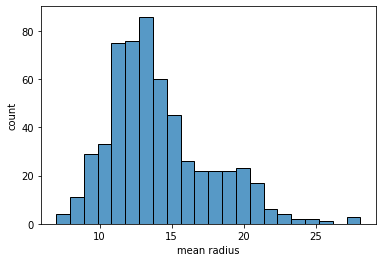

<Figure size 720x720 with 0 Axes>

In [43]:
sns.histplot(data=df, x='mean radius')
plt.xlabel('mean radius')
plt.ylabel('count')
plt.figure(figsize=(10,10))
plt.show;

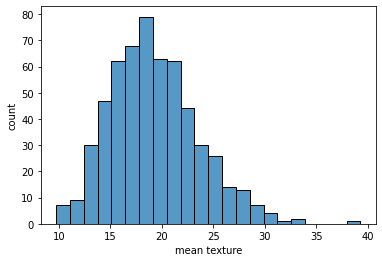

<Figure size 720x720 with 0 Axes>

In [44]:
sns.histplot(data=df, x='mean texture')
plt.xlabel('mean texture')
plt.ylabel('count')
plt.figure(figsize=(10,10))
plt.show;

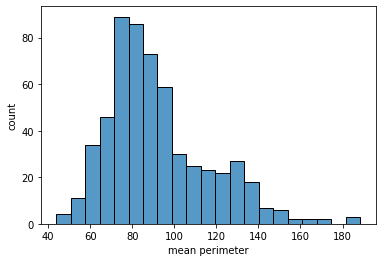

<Figure size 720x720 with 0 Axes>

In [45]:
sns.histplot(data=df, x='mean perimeter')
plt.xlabel('mean perimeter')
plt.ylabel('count')
plt.figure(figsize=(10,10))
plt.show;

Mean radius, mean texture and mean perimeter is close to a normally distribution but there is a long tail meaning that they are slightly right skewed. This means there are some values with a high mean radius, mean texture and mean perimeter. In all three of these graphs, it seems that the mean is greater than median. When the distribution has a high level of skewness, our model will not be as accurate since it assumes that the data we are using is normally distributed. In these 3 cases, the level of skewness does not appear to be high. If there was high level of right skeweness, then we would need to transform the data. This could be done through log transformation to reduce the right skewness and make it more symmetrical. To get a more accurate indication of the distribution of each of these features we can calculate the mean and median values which I did below. 

In [46]:
df['mean radius'].mean()

14.127291739894552

In [47]:
df['mean radius'].median()

13.37

In [48]:
df['mean texture'].mean()

19.289648506151142

In [49]:
df['mean texture'].median()

18.84

In [50]:
df['mean perimeter'].mean()

91.96903339191564

In [51]:
df['mean perimeter'].median()

86.24

From these values, we can see that the mean is higher than the median so the dsitribution is right skewed. This indicates that there is a tail to the right so there are a couple of higher values in the data. This would be a way to confirm what we visualize from our graphs above. 

### 2. Among the variables, what looks like the most defining variable for cancer vs no cancer? How would you observe/test that?

One way to approach this problem would be similar to what we did in class. We can observe the heatmap and the correlation matrix to see which features are the most correlated with the target. However, when we observe the heatmap we see that the some of the features are highly correlated with each other which means that this can cause overfitting in our machine learning model and leads to multicollinearity. If this happens, the variance of the model will increase 
which will also cause overfitting. In this case, we will observe which features are highly correlated and remove them to them determine the most defining variable for cancer vs. no cancer. 

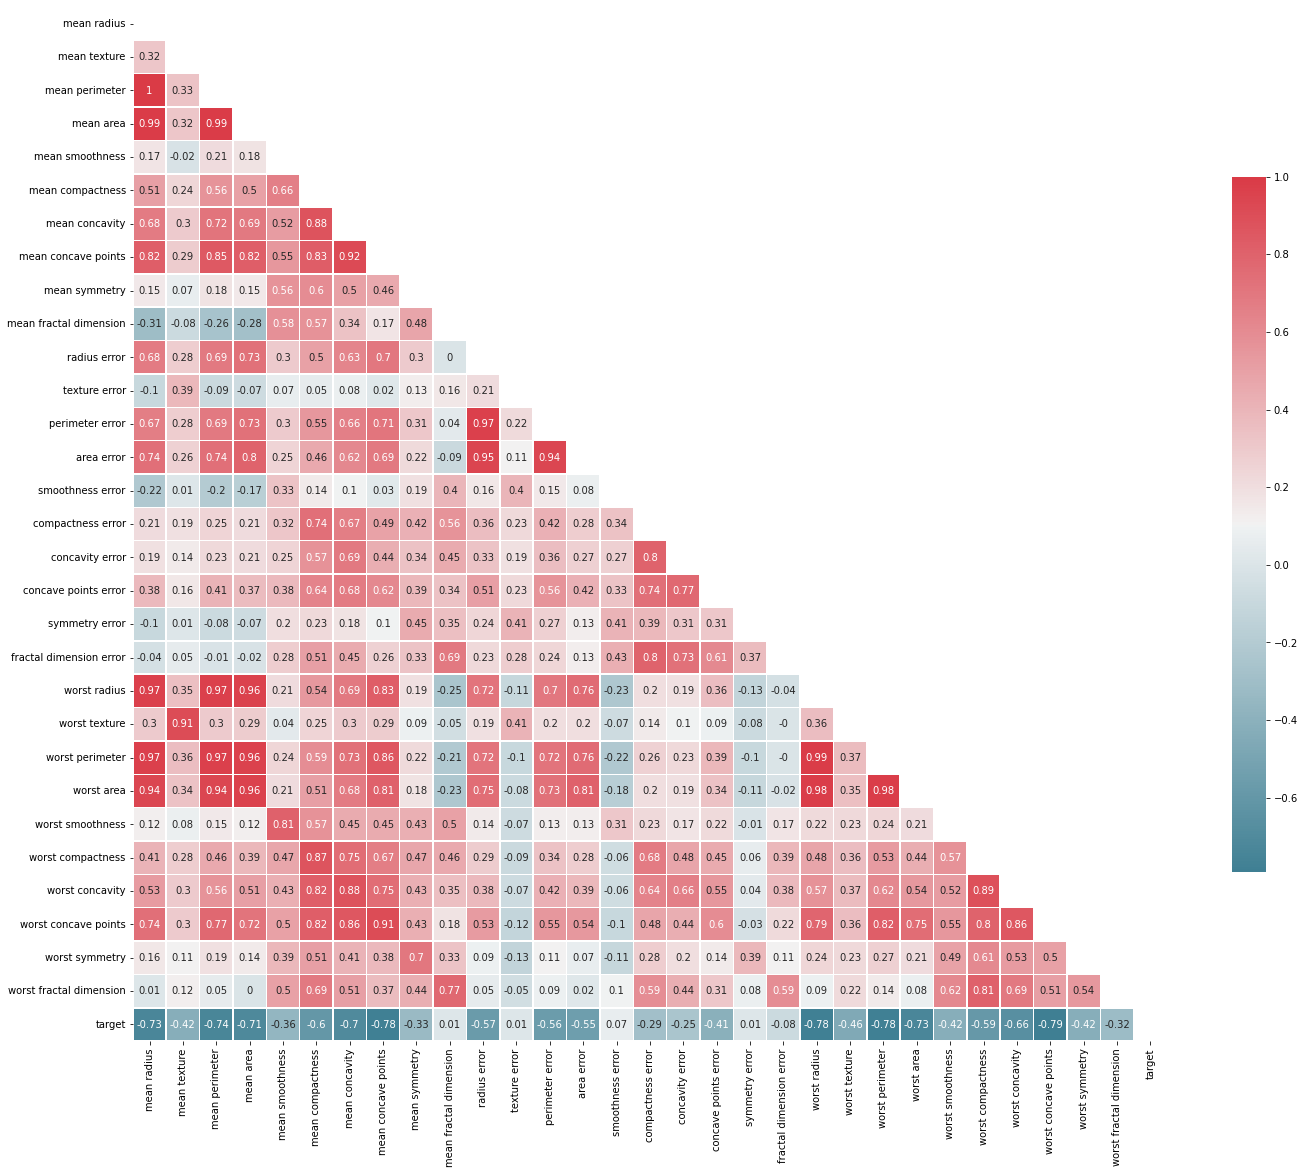

In [30]:
# Generate and visualize the correlation matrix
corr2 = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr2, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

From this correlation matrix, we will need to drop some of the variables because some of the independent variables are highly correlated with each other. If we left them, this would cause issues in our model and determining which features are the most defining. There might be high standard errors for the coefficients. Below, we will remove some of the columns that may cause issues. 

In [31]:
df = sklearn_to_df(datasets.load_breast_cancer())
df

# first, drop all "worst" columns
cols = ['worst radius', 
        'worst texture', 
        'worst perimeter', 
        'worst area', 
        'worst smoothness', 
        'worst compactness', 
        'worst concavity',
        'worst concave points', 
        'worst symmetry', 
        'worst fractal dimension']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['mean perimeter',
        'perimeter error', 
        'mean area', 
        'area error']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['mean concavity',
        'concavity error', 
        'mean concave points', 
        'concave points error']
df = df.drop(cols, axis=1)

# verify remaining columns
len(df.columns)

13

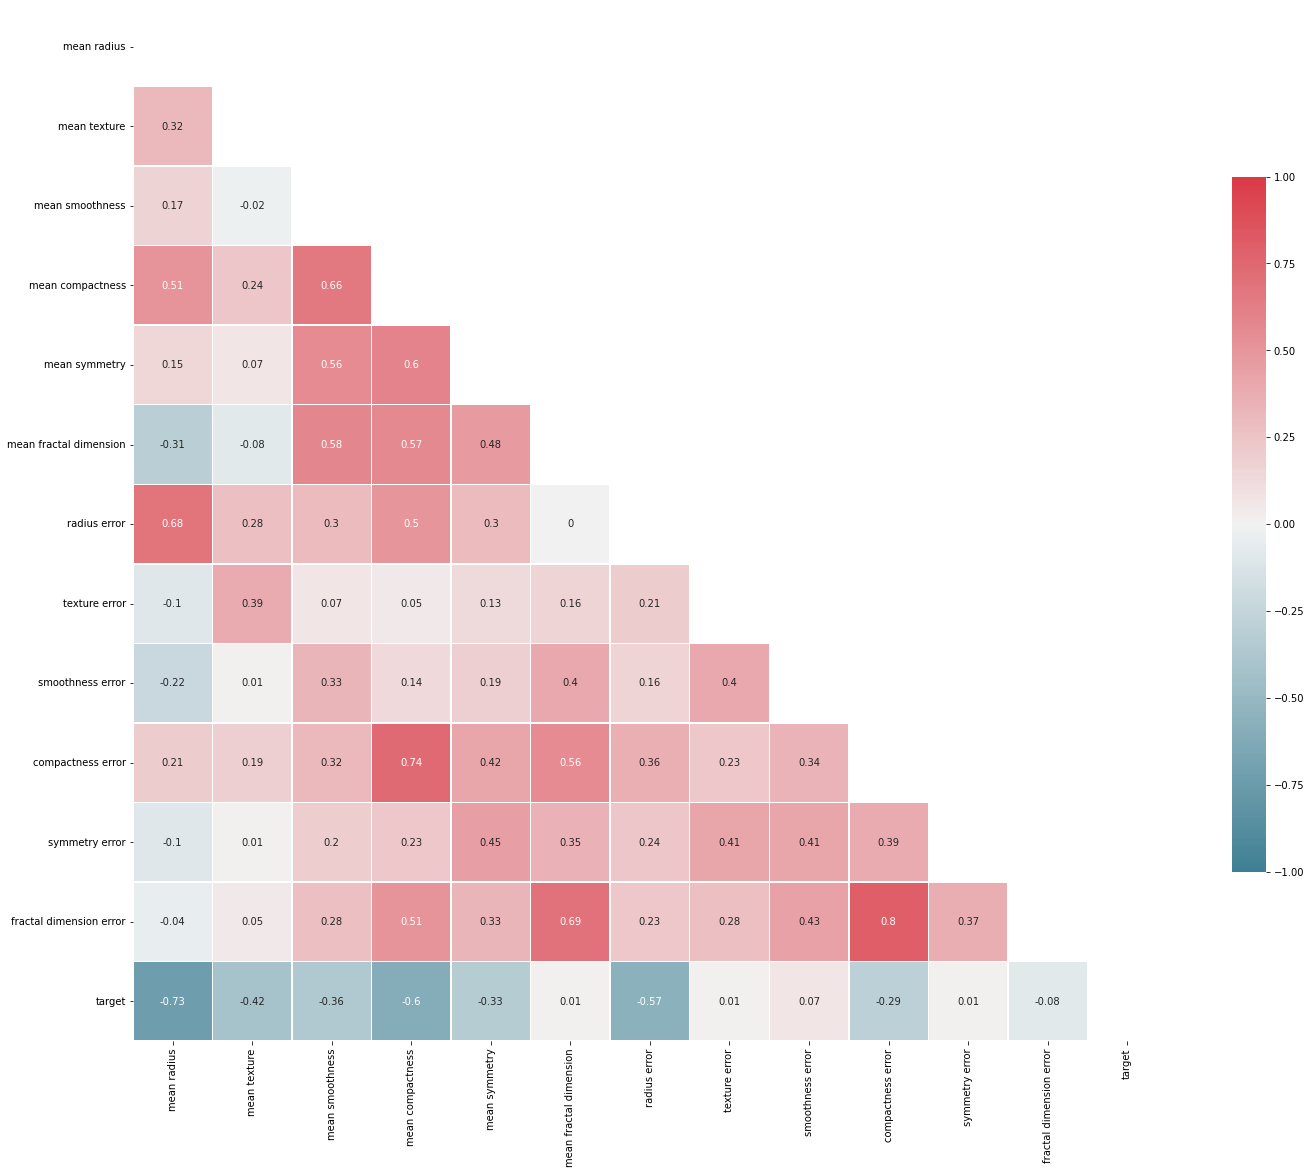

In [32]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

Once removing the features that are highly correlated, we can now see that the mean radius is the most defining variable for cancer vs no cancer. 

To test this, we can use a logistic regression to figure out what is the most defining feature for cancer vs no cancer. Other methods would be a t test to test which variable is the most defining for the target. Below, I used sklearn.feature_selection to import SelectKBest and chi2. By using this, I used chi-squared test to determine which feature is the most defining for the target since we are focusing on classification.

In [104]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [105]:
X = df[['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'smoothness error', 'compactness error',
       'symmetry error', 'fractal dimension error']]
Y = df['target']

In [106]:
most_define_feature = SelectKBest(score_func=chi2, k=1)
fit = most_define_feature.fit(X, Y)

In [110]:
for i in range(len(X.columns)):
    print(X.columns[i], 'score:', fit.scores_[i])

mean radius score: 266.104917195178
mean texture score: 93.8975080986333
mean smoothness score: 0.14989926383938207
mean compactness score: 5.4030754907326894
mean symmetry score: 0.257379774808788
mean fractal dimension score: 7.43065535855238e-05
radius error score: 34.67524723165559
texture error score: 0.0097935397039864
smoothness error score: 0.0032662066394236067
compactness error score: 0.6137853315214395
symmetry error score: 8.036338308403523e-05
fractal dimension error score: 0.006371365657039538


In [111]:
print('Most Defining Feature:', X.columns[fit.scores_.argmax()])

Most Defining Feature: mean radius


### 3. What is the relationship between target and mean radius of the tumor? Hint: boxplot

In [27]:
target_mean_radius_mean = df.groupby('target')['mean radius'].mean()
print("Mean radius mean for target 0:", target_mean_radius_mean[0])
print("Mean radius mean for target 1:", target_mean_radius_mean[1])

Mean radius mean for target 0: 17.46283018867925
Mean radius mean for target 1: 12.14652380952381


The mean radius appears to be much higher when the target is 0 for malignant tumors when compared the the mean radius when the target is 1 (benign tumor). We can confirm this by getting the mean of the mean radius depending on the target. We see that the mean radius mean is 17.46 for malignant tumors compared to the mean radius mean of 12.14 for benign tumors. We can confirm the relationship between the two by using a correlation matrix. 

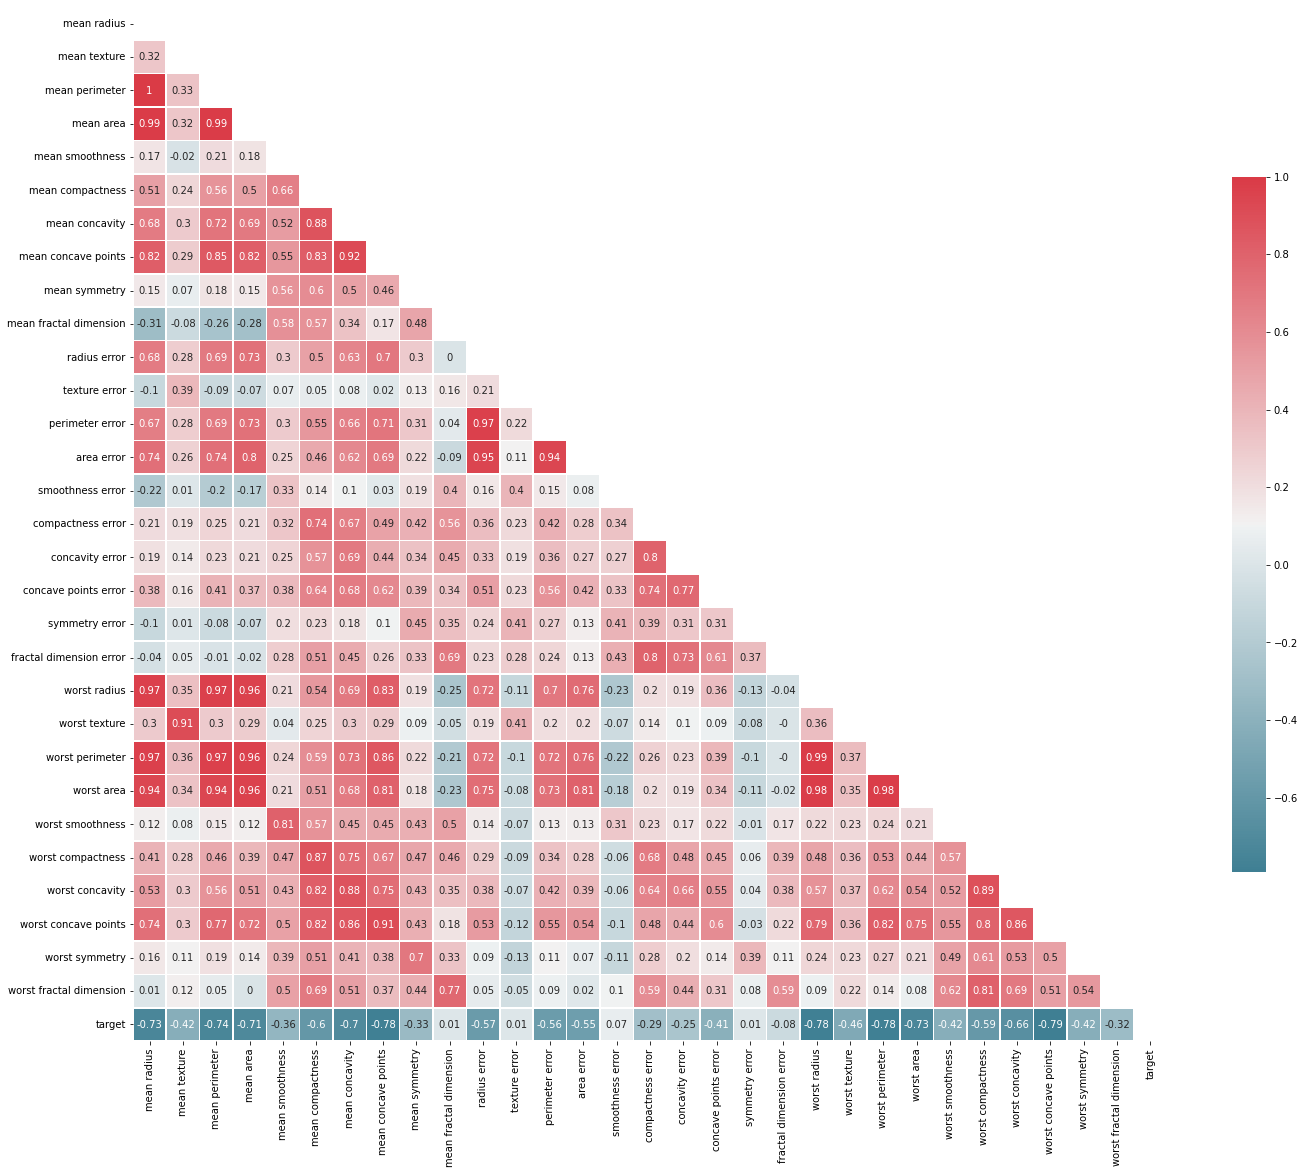

In [67]:
# Generate and visualize the correlation matrix
corr2 = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr2, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

From this heatmap, we can also see the correlation between the mean radius and the target. The correlation coefficient is -0.73 between the two so there is a strong negative relationship. This would indicate a higher mean radius would mean a lower target score. In this case, that would mean the higher the mean radius indiciates a target of 0 which is malignant. Lower mean radius score means the target is 1 which is benign. 

### 4. Build a logistic regression model of your own using other features in this dataset, such as the mean texture and mean symmetry.

In [28]:
from sklearn.linear_model import LogisticRegression

In [52]:
# let's pick an explanatory variable based on the seaborn plot
X_train, X_test, y_train, y_test = train_test_split(df[['mean texture']], df['target'], random_state=2)

In [53]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
clf = LogisticRegression()

In [55]:
clf.fit(X_train, y_train)

LogisticRegression()

In [56]:
X_test[0].reshape(1,-1)

array([[-1.41645777]])

In [57]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0]) #prediction for one patient sample
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

prediction 1
probability [[0.12157764 0.87842236]]


In [59]:
example_df = pd.DataFrame()
example_df.loc[:, 'mean compactness'] = X_test.reshape(-1)
example_df.loc[:, 'target'] = y_test.values
example_df['logistic_preds'] = pd.DataFrame(clf.predict_proba(X_test))[1]

In [60]:
example_df.head(10)

,mean compactness,target,logistic_preds
0,-1.416458,1,0.878422
1,-0.055455,1,0.663431
2,-0.284966,1,0.710471
3,0.075367,0,0.635009
4,-0.643004,1,0.775457
5,2.163922,0,0.191613
6,0.192418,1,0.608748
7,-0.808252,1,0.801723
8,-0.321688,1,0.717627
9,-1.065305,1,0.837866


In [62]:
score = clf.score(X_test, y_test)
print(score)

0.6923076923076923


In [63]:
score_train = clf.score(X_train, y_train)
print('training dataset accuracy: ', score_train)

training dataset accuracy:  0.687793427230047


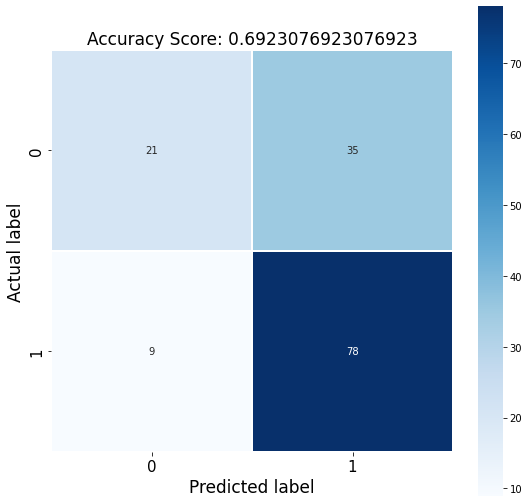

In [64]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [65]:
modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   

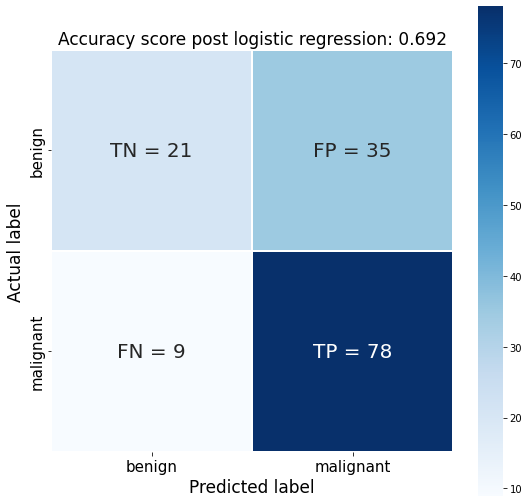

In [66]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['benign', 'malignant'],
            yticklabels = ['benign', 'malignant'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy score post logistic regression: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

### 5. Bonus question: Why should we choose mean or median values for when we replace missing values in a dataset? Or what else can we do to address the missing values in a dataset? (2 points)

To replace missing values in datasets we can use mean or median values. We usually will choose the mean values when the data is normally distributed. This is because when the data is normally distributed the mean will be an accurate representation of the data. When we are dealing with data that has a skewed distribution, the median values should be used to replace the missing values. This is because the mean wouldn't be an accurate representation of all the values since there are going to be some higher values or lower values and it is more sensitive to it compared to the median. In this case, the median would be better to replace the missing values. Other options other than replacing missing values using mean or median values, we can also use other methods to replace missing values. This includes using regression imputation which involves using other features that are correlated with the missing value feature. This is usually used for numerical data just as the mean or median value method. For categorical data, we can also use the mode to replace the missing values. This is best used for normal distributed data though. 